<a href="https://colab.research.google.com/github/YinhaoHe/Python-AI-teaching/blob/master/Copy_of_Assignment_doing_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science — Regression 2_

# Doing Linear Regression

### Objectives
- acquire data for features
- arrange data into X features matrix and y target vector
- begin with baselines for regression
- use scikit-learn for linear regression
- use regression metric: MAE
- do leave-one-out cross-validation

### Contents
1. Pre-reads
2. Process
3. Project

# Pre-reads

#### [Jake VanderPlas, Python Data Science Handbook, Chapter 5.2, Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html). 

Read up through “Supervised learning example: Simple linear regression”. You can stop when you get to “Supervised learning example: Iris classification.”

#### [Nate Silver, What Do Economic Models Really Tell Us About Elections?](https://fivethirtyeight.com/features/what-do-economic-models-really-tell-us-about-elections/)

Read the whole thing. We’ll make a model similar to the “Bread and Peace” model...

>Perhaps the best-known of these models is the so-called “Bread and Peace” model designed by Douglas Hibbs of the University of Gothenberg. There are a lot of things to admire about this model. Most notably, it’s not larded down with superfluous variables. Instead, it is based on just two: growth in real, per-capita disposable income, and the number of military fatalities resulting from U.S.-initiated foreign conflicts.

... and then you’ll make your own elections model, with two features of your choice.

# Process

#### Renee Teate, [Becoming a Data Scientist, PyData DC 2016 Talk](https://www.becomingadatascientist.com/2016/10/11/pydata-dc-2016-talk/)

![](https://image.slidesharecdn.com/becomingadatascientistadvice-pydatadc-shared-161012184823/95/becoming-a-data-scientist-advice-from-my-podcast-guests-55-638.jpg?cb=1476298295)


## Business Question --> Data Question --> Data Answer (for Supervised Learning)

#### Francois Chollet, [Deep Learning with Python](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/README.md), Chapter 4: Fundamentals of machine learning, "A universal workflow of machine learning"
 
> **1. Define the problem at hand and the data on which you’ll train.** Collect this data, or annotate it with labels if need be.

> **2. Choose how you’ll measure success on your problem.** Which metrics will you monitor on your validation data?

> **3. Determine your evaluation protocol:** hold-out validation? K-fold validation? Which portion of the data should you use for validation?

> **4. Develop a first model that does better than a basic baseline:** a model with statistical power.

> **5. Develop a model that overfits.** The universal tension in machine learning is between optimization and generalization; the ideal model is one that stands right at the border between underfitting and overfitting; between undercapacity and overcapacity. To figure out where this border lies, first you must cross it.

> **6. Regularize your model and tune its hyperparameters, based on performance on the validation data.** Repeatedly modify your model, train it, evaluate on your validation data (not the test data, at this point), modify it again, and repeat, until the model is as good as it can get. 

> **Iterate on feature engineering: add new features, or remove features that don’t seem to be informative.** Once you’ve developed a satisfactory model configuration, you can train your final production model on all the available data (training and validation) and evaluate it one last time on the test set.


## Define the data on which you'll train / Add new features or remove features

#### Jake VanderPlas, [Python Data Science Handbook, Chapter 5.2, Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html), Data Representation in Scikit-Learn

> The best way to think about data within Scikit-Learn is in terms of tables of data.

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.02-samples-features.png)

> The samples (i.e., rows) always refer to the individual objects described by the dataset. For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

> The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner. 

> The information can be thought of as a two-dimensional numerical array or matrix, which we will call the _features matrix._ By convention, this features matrix is often stored in a variable named `X`. The features matrix is assumed to be two-dimensional, with shape `[n_samples, n_features]`, and is most often contained in a NumPy array or a Pandas `DataFrame`, though some Scikit-Learn models also accept SciPy sparse matrices.

> In addition to the feature matrix `X`, we also generally work with a label or target array, which by convention we will usually call `y`. The target array is usually one dimensional, with length `n_samples`, and is generally contained in a NumPy array or Pandas `Series`. 

> Often one point of confusion is how the target array differs from the other features columns. The distinguishing feature of the target array is that it is usually the quantity we want to _predict from the data:_ in statistical terms, it is the dependent variable.

#### Google Developers, [Machine Learning Glossary](https://developers.google.com/machine-learning/glossary/#l) 

> Each example in a labeled dataset consists of one or more features and a label. 

> For instance, in a housing dataset, the features might include the number of bedrooms, the number of bathrooms, and the age of the house, while the label might be the house's price. 

> In a spam detection dataset, the features might include the subject line, the sender, and the email message itself, while the label would probably be either "spam" or "not spam."

#### Wikipedia, [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

## Determine evaluation protocol

#### Sebastian Raschka, [Model Evaluation]( https://sebastianraschka.com/blog/2018/model-evaluation-selection-part4.html)
> <img src="https://sebastianraschka.com/images/blog/2018/model-evaluation-selection-part4/model-eval-conclusions.jpg" width="600">

## Develop a first model that does better than a basic baseline

### Why begin with baselines?

[My mentor](https://www.linkedin.com/in/jason-sanchez-62093847/) [taught me](https://youtu.be/0GrciaGYzV0?t=40s):

>***Your first goal should always, always, always be getting a generalized prediction as fast as possible.*** You shouldn't spend a lot of time trying to tune your model, trying to add features, trying to engineer features, until you've actually gotten one prediction, at least. 

> The reason why that's a really good thing is because then ***you'll set a benchmark*** for yourself, and you'll be able to directly see how much effort you put in translates to a better prediction. 

> What you'll find by working on many models: some effort you put in, actually has very little effect on how well your final model does at predicting new observations. Whereas some very easy changes actually have a lot of effect. And so you get better at allocating your time more effectively.

My mentor's advice is echoed and elaborated in several sources:

[Always start with a stupid model, no exceptions](https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa)

> Why start with a baseline? A baseline will take you less than 1/10th of the time, and could provide up to 90% of the results. A baseline puts a more complex model into context. Baselines are easy to deploy.

[Measure Once, Cut Twice: Moving Towards Iteration in Data Science](https://blog.datarobot.com/measure-once-cut-twice-moving-towards-iteration-in-data-science)

> The iterative approach in data science starts with emphasizing the importance of getting to a first model quickly, rather than starting with the variables and features. Once the first model is built, the work then steadily focuses on continual improvement.

[*Data Science for Business*](https://books.google.com/books?id=4ZctAAAAQBAJ&pg=PT276), Chapter 7.3: Evaluation, Baseline Performance, and Implications for Investments in Data

> *Consider carefully what would be a reasonable baseline against which to compare model performance.* This is important for the data science team in order to understand whether they indeed are improving performance, and is equally important for demonstrating to stakeholders that mining the data has added value.

### What does baseline mean?

Baseline is an overloaded term, as you can see in the links above. Baseline has multiple meanings:

#### The score you'd get by guessing a single value

> A baseline for classification can be the most common class in the training dataset.

> A baseline for regression can be the mean of the training labels. —[Will Koehrsen](https://twitter.com/koehrsen_will/status/1088863527778111488)

#### The score you'd get by guessing in a more granular way

> A baseline for time-series regressions can be the value from the previous timestep.

#### Fast, first models that beat guessing

What my mentor was talking about.

#### Complete, tuned "simpler" model

Can be simpler mathematically and computationally. For example, Logistic Regression versus Deep Learning.

Or can be simpler for the data scientist, with less work. For example, a model with less feature engineering versus a model with more feature engineering.

#### Minimum performance that "matters"

To go to production and get business value.

#### Human-level performance 

Your goal may to be match, or nearly match, human performance, but with better speed, cost, or consistency.

Or your goal may to be exceed human performance.

## Use scikit-learn to fit a model

#### Jake VanderPlas, [Python Data Science Handbook, Chapter 5.2, Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html), Scikit-Learn's Estimator API

> Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow).

> 1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn. 
> 2. Choose model hyperparameters by instantiating this class with desired values. 
> 3. Arrange data into a features matrix and target vector following the discussion above.
> 4. Fit the model to your data by calling the `fit()` method of the model instance.
> 5. Apply the Model to new data: For supervised learning, often we predict labels for unknown data using the `predict()` method.

# Project

### Predict presidential election voting, doing linear regression with two features

#### Douglas Hibbs, [Background Information on the ‘Bread and Peace’ Model of Voting in Postwar US Presidential Elections](https://douglas-hibbs.com/background-information-on-bread-and-peace-voting-in-us-presidential-elections/)

> According to the ‘Bread and Peace’ model, postwar US presidential elections can for the most part be interpreted as a sequence of referendums on the incumbent party’s record during its four-year mandate period. 

> In fact aggregate two-party vote shares going to candidates of the party holding the presidency during the postwar era are well explained by just two fundamental determinants:

> (1) Positively by weighted-average growth of per capita real disposable personal income over the term.

> (2) Negatively by cumulative US military fatalities (scaled to population) owing to unprovoked, hostile deployments of American armed forces in foreign wars.

![](https://douglas-hibbs.com/wp-content/uploads/2013/08/BP1v4c2.jpg)



## Define the data on which you'll train

### Load data

#### Sources
- 1952-2012: Douglas Hibbs, [2014 lecture at Deakin University Melbourne](http://www.douglas-hibbs.com/HibbsArticles/HIBBS-PRESVOTE-SLIDES-MELBOURNE-Part1-2014-02-26.pdf), Slide 40
- 2016, Vote Share: [The American Presidency Project](https://www.presidency.ucsb.edu/statistics/elections)
- 2016, Recent Growth in Personal Incomes: [The 2016 election economy: the "Bread and Peace" model final forecast](https://angrybearblog.com/2016/11/the-2016-election-economy-the-bread-and-peace-model-final-forecast.html)
- 2016, US Military Fatalities: Assumption that Afghanistan War fatalities in 2012-16 occured at the same rate as 2008-12


In [ ]:
import pandas as pd

columns = ['Year','Incumbent Party Candidate','Other Candidate','Incumbent Party Vote Share']

data = [[1952,"Stevenson","Eisenhower",44.6],
        [1956,"Eisenhower","Stevenson",57.76],
        [1960,"Nixon","Kennedy",49.91],
        [1964,"Johnson","Goldwater",61.34],
        [1968,"Humphrey","Nixon",49.60],
        [1972,"Nixon","McGovern",61.79],
        [1976,"Ford","Carter",48.95],
        [1980,"Carter","Reagan",44.70],
        [1984,"Reagan","Mondale",59.17],
        [1988,"Bush, Sr.","Dukakis",53.94],
        [1992,"Bush, Sr.","Clinton",46.55],
        [1996,"Clinton","Dole",54.74],
        [2000,"Gore","Bush, Jr.",50.27],
        [2004,"Bush, Jr.","Kerry",51.24],
        [2008,"McCain","Obama",46.32],
        [2012,"Obama","Romney",52.00], 
        [2016,"Clinton","Trump",48.2]]
        
votes = pd.DataFrame(data=data, columns=columns)

In [ ]:
columns = ['Year','Average Recent Growth in Personal Incomes']

data = [[1952,2.40],
        [1956,2.89],
        [1960, .85],
        [1964,4.21],
        [1968,3.02],
        [1972,3.62],
        [1976,1.08],
        [1980,-.39],
        [1984,3.86],
        [1988,2.27],
        [1992, .38],
        [1996,1.04],
        [2000,2.36],
        [2004,1.72],
        [2008, .10],
        [2012, .95], 
        [2016, .10]]
        
growth = pd.DataFrame(data=data, columns=columns)

In [ ]:
"""
Fatalities denotes the cumulative number of American military
fatalities per millions of US population the in Korea, Vietnam,
Iraq and Afghanistan wars during the presidential terms
preceding the 1952, 1964, 1968, 1976 and 2004, 2008 and
2012 elections.

http://www.douglas-hibbs.com/HibbsArticles/HIBBS-PRESVOTE-SLIDES-MELBOURNE-Part1-2014-02-26.pdf
"""

columns = ['Year','US Military Fatalities per Million']

data = [[1952,190],
        [1956,  0],
        [1960,  0],
        [1964,  1],
        [1968,146],
        [1972,  0],
        [1976,  2],
        [1980,  0],
        [1984,  0],
        [1988,  0],
        [1992,  0],
        [1996,  0],
        [2000,  0],
        [2004,  4],
        [2008, 14],
        [2012,  5], 
        [2016,  5]]
        
deaths = pd.DataFrame(data=data, columns=columns)

### Merge data

In [ ]:
votes.shape, growth.shape, deaths.shape

((17, 4), (17, 2), (17, 2))

In [ ]:
votes.columns, growth.columns, deaths.columns

(Index(['Year', 'Incumbent Party Candidate', 'Other Candidate',
        'Incumbent Party Vote Share'],
       dtype='object'),
 Index(['Year', 'Average Recent Growth in Personal Incomes'], dtype='object'),
 Index(['Year', 'US Military Fatalities per Million'], dtype='object'))

In [ ]:
df = votes.merge(growth).merge(deaths)
df.shape

(17, 6)

In [ ]:
df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million
0,1952,Stevenson,Eisenhower,44.60,2.40,190
1,1956,Eisenhower,Stevenson,57.76,2.89,0
2,1960,Nixon,Kennedy,49.91,0.85,0
3,1964,Johnson,Goldwater,61.34,4.21,1
4,1968,Humphrey,Nixon,49.60,3.02,146
5,1972,Nixon,McGovern,61.79,3.62,0
6,1976,Ford,Carter,48.95,1.08,2
7,1980,Carter,Reagan,44.70,-0.39,0
8,1984,Reagan,Mondale,59.17,3.86,0
9,1988,"Bush, Sr.",Dukakis,53.94,2.27,0


## Begin with baselines for regression

In [ ]:
df['Incumbent Party Vote Share'].describe()

count    17.000000
mean     51.828235
std       5.510739
min      44.600000
25%      48.200000
50%      50.270000
75%      54.740000
max      61.790000
Name: Incumbent Party Vote Share, dtype: float64

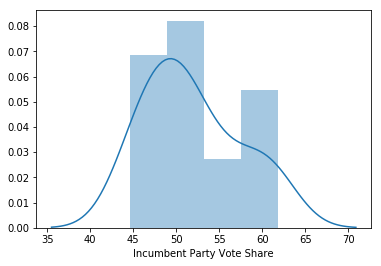

In [ ]:
%matplotlib inline
import seaborn as sns
sns.distplot(df['Incumbent Party Vote Share']);

In [ ]:
target = 'Incumbent Party Vote Share'

# This would be more typical
mean_baseline = [df[target].mean()] * len(df)

# We'll do this here for demonstration purposes
df['Mean Baseline'] = df[target].mean()
df['Error'] = df['Mean Baseline'] - df[target]
df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Mean Baseline,Error
0,1952,Stevenson,Eisenhower,44.60,2.40,190,51.828235,7.228235
1,1956,Eisenhower,Stevenson,57.76,2.89,0,51.828235,-5.931765
2,1960,Nixon,Kennedy,49.91,0.85,0,51.828235,1.918235
3,1964,Johnson,Goldwater,61.34,4.21,1,51.828235,-9.511765
4,1968,Humphrey,Nixon,49.60,3.02,146,51.828235,2.228235
5,1972,Nixon,McGovern,61.79,3.62,0,51.828235,-9.961765
6,1976,Ford,Carter,48.95,1.08,2,51.828235,2.878235
7,1980,Carter,Reagan,44.70,-0.39,0,51.828235,7.128235
8,1984,Reagan,Mondale,59.17,3.86,0,51.828235,-7.341765
9,1988,"Bush, Sr.",Dukakis,53.94,2.27,0,51.828235,-2.111765


In [ ]:
# a wrong way
df['Error'].sum()

-1.4210854715202004e-14

In [ ]:
# a right way
df['Absolute Error'] = df['Error'].abs()
df['Absolute Error'].sum()

75.88470588235293

In [ ]:
75.88 / 17

4.463529411764705

In [ ]:
df['Absolute Error'].mean()

4.463806228373703

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true=df['Incumbent Party Vote Share'], 
                    y_pred=df['Mean Baseline'])

4.463806228373702

## Use scikit-learn for linear regression, with 1 feature




Follow the process from Jake VanderPlas, [Python Data Science Handbook, Chapter 5.2, Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html), Scikit-Learn's Estimator API

### Choose a class of model by importing the appropriate estimator class from Scikit-Learn


In [ ]:
from sklearn.linear_model import LinearRegression

### Choose model hyperparameters by instantiating this class with desired values

Refer to scikit-learn documentation to see what model hyperparameters you can choose. For example: [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
model = LinearRegression()

### Arrange data into X features matrix and y target vector

In [ ]:
X = df[['Average Recent Growth in Personal Incomes']]
y = df['Incumbent Party Vote Share']

type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
X.shape, y.shape

((17, 1), (17,))

In [ ]:
features = ['Average Recent Growth in Personal Incomes']
target = 'Incumbent Party Vote Share'
X = df[features]
y = df[target]

### Fit the model to your data by calling the `fit()` method of the model instance

In [ ]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Apply the Model to new data: For supervised learning, often we predict labels for unknown data using the `predict()` method

In [ ]:
y_pred = model.predict(X)

## Use regression metric: MAE

In [ ]:
mean_absolute_error(y, y_pred)

2.5291938349608953

In [ ]:
# We won't usually add predictions back to the original dataframe as a new column, 
# But we'll do this here just for demonstration purposes
df['Linear Regression, 1 feature'] = y_pred
df['Error'] = df['Linear Regression, 1 feature'] - df[target]
df['Absolute Error'] = df['Error'].abs()

df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Mean Baseline,Error,Absolute Error,"Linear Regression, 1 feature"
0,1952,Stevenson,Eisenhower,44.60,2.40,190,51.828235,9.037235,9.037235,53.637235
1,1956,Eisenhower,Stevenson,57.76,2.89,0,51.828235,-2.665418,2.665418,55.094582
2,1960,Nixon,Kennedy,49.91,0.85,0,51.828235,-0.882740,0.882740,49.027260
3,1964,Johnson,Goldwater,61.34,4.21,1,51.828235,-2.319505,2.319505,59.020495
4,1968,Humphrey,Nixon,49.60,3.02,146,51.828235,5.881225,5.881225,55.481225
5,1972,Nixon,McGovern,61.79,3.62,0,51.828235,-4.524269,4.524269,57.265731
6,1976,Ford,Carter,48.95,1.08,2,51.828235,0.761321,0.761321,49.711321
7,1980,Carter,Reagan,44.70,-0.39,0,51.828235,0.639281,0.639281,45.339281
8,1984,Reagan,Mondale,59.17,3.86,0,51.828235,-1.190467,1.190467,57.979533
9,1988,"Bush, Sr.",Dukakis,53.94,2.27,0,51.828235,-0.689408,0.689408,53.250592


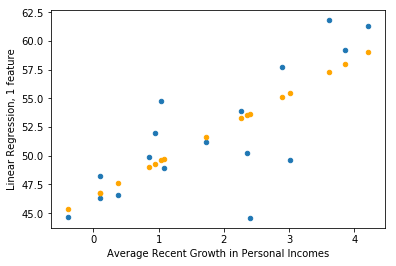

In [ ]:
ax = df.plot(x='Average Recent Growth in Personal Incomes', 
             y='Incumbent Party Vote Share', 
             kind='scatter')

df.plot(x='Average Recent Growth in Personal Incomes', 
        y='Linear Regression, 1 feature', 
        kind='scatter', 
        color='orange', 
        ax=ax);

In [ ]:
len(y_pred)

17

In [ ]:
X.values

array([[ 2.4 ],
       [ 2.89],
       [ 0.85],
       [ 4.21],
       [ 3.02],
       [ 3.62],
       [ 1.08],
       [-0.39],
       [ 3.86],
       [ 2.27],
       [ 0.38],
       [ 1.04],
       [ 2.36],
       [ 1.72],
       [ 0.1 ],
       [ 0.95],
       [ 0.1 ]])

In [ ]:
y_pred

array([53.63723477, 55.09458154, 49.02726028, 59.0204953 , 55.48122457,
       57.26573082, 49.71132101, 45.33928069, 57.97953332, 53.25059175,
       47.62939705, 49.59235393, 53.51826769, 51.61479435, 46.79662747,
       49.32467799, 46.79662747])

In [ ]:
# What incumbent party vote share does the model predict for 2.4% personal income growth?
model.predict([[2.4]])

array([53.63723477])

In [ ]:
# What incumbent party vote share does the model predict for 1% personal income growth?
model.predict([[1]])

array([49.47338685])

In [ ]:
model.predict([[2]])

array([52.44756393])

In [ ]:
model.predict([[3]])

array([55.42174102])

In [ ]:
model.predict([[3]]) - model.predict([[2]])

array([2.97417709])

In [ ]:
model.predict([[2]]) - model.predict([[1]])

array([2.97417709])

In [ ]:
model.predict([[0]])

array([46.49920976])

In [ ]:
model.coef_, model.intercept_

(array([2.97417709]), 46.499209757741625)

In [ ]:
model.predict([[20]])

array([105.98275153])

In [ ]:
model.predict([[-20]])

array([-12.98433201])

## Use scikit-learn for linear regression, with 2 features

Follow the process from Jake VanderPlas, [Python Data Science Handbook, Chapter 5.2, Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html), Scikit-Learn's Estimator API

### Choose a class of model by importing the appropriate estimator class from Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression

### Choose model hyperparameters by instantiating this class with desired values

In [ ]:
model = LinearRegression()

### Arrange data into X features matrix and y target vector

In [ ]:
features = ['Average Recent Growth in Personal Incomes', 
            'US Military Fatalities per Million']

target = 'Incumbent Party Vote Share'

X = df[features]
y = df[target]

### Fit the model to your data by calling the `fit()` method of the model instance

In [ ]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Apply the Model to new data: For supervised learning, often we predict labels for unknown data using the `predict()` method

In [ ]:
y_pred = model.predict(X)

## Use regression metric: MAE

In [ ]:
mean_absolute_error(y, y_pred)

1.3975663494016117

In [ ]:
df['Linear Regression, 2 features'] = y_pred
df['Error'] = y_pred - df[target]
df['Absolute Error'] = df['Error'].abs()
df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Mean Baseline,Error,Absolute Error,"Linear Regression, 1 feature","Linear Regression, 2 features"
0,1952,Stevenson,Eisenhower,44.60,2.40,190,51.828235,0.247507,0.247507,53.637235,44.847507
1,1956,Eisenhower,Stevenson,57.76,2.89,0,51.828235,-1.030524,1.030524,55.094582,56.729476
2,1960,Nixon,Kennedy,49.91,0.85,0,51.828235,-0.129201,0.129201,49.027260,49.780799
3,1964,Johnson,Goldwater,61.34,4.21,1,51.828235,-0.168074,0.168074,59.020495,61.171926
4,1968,Humphrey,Nixon,49.60,3.02,146,51.828235,-0.275542,0.275542,55.481225,49.324458
5,1972,Nixon,McGovern,61.79,3.62,0,51.828235,-2.573988,2.573988,57.265731,59.216012
6,1976,Ford,Carter,48.95,1.08,2,51.828235,1.506724,1.506724,49.711321,50.456724
7,1980,Carter,Reagan,44.70,-0.39,0,51.828235,0.857093,0.857093,45.339281,45.557093
8,1984,Reagan,Mondale,59.17,3.86,0,51.828235,0.863503,0.863503,57.979533,60.033503
9,1988,"Bush, Sr.",Dukakis,53.94,2.27,0,51.828235,0.677623,0.677623,53.250592,54.617623


## Do test-train split

[Nate Silver's post on economic elections models](https://fivethirtyeight.com/features/what-do-economic-models-really-tell-us-about-elections/) discusses out-of-sample testing.


In [ ]:
train = df.query('Year < 2008')
test  = df.query('Year >= 2008')
X_train = train[features] 
y_train = train[target]
X_test  = test[features]
y_test  = test[target]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14, 2), (14,), (3, 2), (3,))

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_test)

y_pred

array([45.86970509, 49.39965918, 46.34811893])

In [ ]:
y_test

14    46.32
15    52.00
16    48.20
Name: Incumbent Party Vote Share, dtype: float64

In [ ]:
mean_absolute_error(y_test, y_pred)

1.6341722692537293

## Do leave-one-out cross-validation


[Sebastian Raschka's chart](https://sebastianraschka.com/images/blog/2018/model-evaluation-selection-part4/model-eval-conclusions.jpg) shows that "leave-one-out cross-validation" is an option for small datasets.

In [ ]:
# Choose a class of model by importing the appropriate estimator class
from sklearn.linear_model import LinearRegression

print('Leave-One-Out Cross-Validation, Do-It-Yourself implementation:')

maes = []

for year in df['Year']:
    print(f'Fit Linear Regression on all years except {year}')
    
    # Choose model hyperparamaters by instantiating this class
    model = LinearRegression()
    
    # Arrange data into X features matrix and y target vector
    train = df[df['Year'] != year]
    test = df[df['Year'] == year]
    X_train = train[features]
    y_train = train[target]
    X_test = test[features]
    y_test = test[target]
    
    # Fit the model to your data by calling the fit() method of the estimator
    model.fit(X_train, y_train)
    
    # Apply the model to new data: predict labels for unknown data using predict() method
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    maes.append(mae)
    print(f'Absolute Error on prediction for {year} = {mae}')
    

Leave-One-Out Cross-Validation, Do-It-Yourself implementation:
Fit Linear Regression on all years except 1952
Absolute Error on prediction for 1952 = 0.6710286794539044
Fit Linear Regression on all years except 1956
Absolute Error on prediction for 1956 = 1.1652530150273535
Fit Linear Regression on all years except 1960
Absolute Error on prediction for 1960 = 0.14204849628617922
Fit Linear Regression on all years except 1964
Absolute Error on prediction for 1964 = 0.23142167116768775
Fit Linear Regression on all years except 1968
Absolute Error on prediction for 1968 = 0.44497540045065165
Fit Linear Regression on all years except 1972
Absolute Error on prediction for 1972 = 3.1780175021763313
Fit Linear Regression on all years except 1976
Absolute Error on prediction for 1976 = 1.635190786562319
Fit Linear Regression on all years except 1980
Absolute Error on prediction for 1980 = 1.0804837297850156
Fit Linear Regression on all years except 1984
Absolute Error on prediction for 1984 = 

In [ ]:
# Leave-One-Out Cross-Validation Mean Absolute Error
pd.Series(maes).mean()

1.6106955021668998

## Assignment

#### Predict presidential election voting, with two features you choose!
- Start a new notebook.
- You may reuse one of the features from the "Bread & Peace" model.
- **Acquire data for at least one new feature.** The links below may help!
- Commit your notebook to your fork of the GitHub repo.

#### Why I'm asking you to acquire data for at least one new [feature](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### You can search [FRED (Federal Reserve Bank of St. Louis)](https://fred.stlouisfed.org/) for these keywords
- real disposable income change annual
- gdp change annual
- unemployment 

#### Go to [BEA (Bureau of Economic Analysis)](https://apps.bea.gov/itable/) and follow these steps
- National Data - GDP & Personal Income
- Begin using the data
- Section 1 - DOMESTIC PRODUCT AND INCOME
- Table 1.17.1. Percent Change From Preceding Period in Real Gross Domestic Product, Real Gross Domestic Income, and Other Major NIPA Aggregates
- Modify
  - First Year: 1947
  - Last Year: 2018
  - Series: Annual
  - Refresh Table
- Download

#### Go to Wikipedia, [United States military casualties of war, Wars ranked by total number of U.S. military deaths](https://en.wikipedia.org/wiki/United_States_military_casualties_of_war#Wars_ranked_by_total_number_of_U.S._military_deaths)
- You can try this tutorial to scrape data from HTML tables: [Quick Tip: The easiest way to grab data out of a web page in Python](https://medium.com/@ageitgey/quick-tip-the-easiest-way-to-grab-data-out-of-a-web-page-in-python-7153cecfca58)

#### Read more about economic features to predict elections
- [Which Economic Indicators Best Predict Presidential Elections?](https://fivethirtyeight.blogs.nytimes.com/2011/11/18/which-economic-indicators-best-predict-presidential-elections/)
- [What stat best gets at the question, "Are you better off now than you were a year ago?"](https://www.theatlantic.com/business/archive/2010/11/the-most-important-economic-indicator-in-midterm-elections/65505/)
- [Time for change model](https://pollyvote.com/en/components/econometric-models/time-for-change-model/)


#### You can try for a "serious" model or a "spurious" model. Here are more data sources you can try
- [Tyler Vigen, Spurious Correlations, Discover a Correlation](https://tylervigen.com/discover)
- [CDC (Centers for Disease Control), Compressed Mortality data](https://wonder.cdc.gov/mortSQL.html)
- [Data Is Plural](https://tinyletter.com/data-is-plural)
- [Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/)
- [Campaign Finance Institute, Historical Stats](http://www.cfinst.org/data/historicalstats.aspx)
- Or find your own data and features to try!





In [ ]:
from google.colab import files
uploaded  =  files.upload()

In [ ]:
debt = pd.read_csv('nationaldebt1929t02019withmajorevents - Sheet1.csv')

In [ ]:
print(debt.shape)

debt.tail()

(20, 4)


,End of Fiscal Year,"Debt (as of 9/30, in billions)",Debt/ GDP Ratio,Major Events by Presidential Term
15,2012,"16,066.00",0.99,Fiscal cliff
16,2016,"19,573.00",1.04,Defense = $767.6 b.
17,2017,"20,245.00",1.03,Congress raised debt ceiling.
18,2018,"21,516.00",1.05,Trump tax cuts.
19,2019,"22,776.00",1.06,Defense = $956.5 b.


In [ ]:
debt.rename(columns={'End of Fiscal Year':'Year'}, inplace=True)
debt.head()


,Year,"Debt (as of 9/30, in billions)",Debt/ GDP Ratio,Major Events by Presidential Term
0,1952,259.00,0.72,NaN
1,1956,273.00,0.61,NaN
2,1960,286.00,0.53,Recession.
3,1964,312.00,0.46,LBJ's budgets. War on poverty.
4,1968,348.00,0.37,Moon landing.


In [ ]:
print(df.shape)
df.tail()

(17, 11)


,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Mean Baseline,Error,Absolute Error,"Linear Regression, 1 feature","Linear Regression, 2 features"
12,2000,Gore,"Bush, Jr.",50.27,2.36,0,51.828235,4.654182,4.654182,53.518268,54.924182
13,2004,"Bush, Jr.",Kerry,51.24,1.72,4,51.828235,1.289196,1.289196,51.614794,52.529196
14,2008,McCain,Obama,46.32,0.10,14,51.828235,0.153607,0.153607,46.796627,46.473607
15,2012,Obama,Romney,52.00,0.95,5,51.828235,-2.147341,2.147341,49.324678,49.852659
16,2016,Clinton,Trump,48.20,0.10,5,51.828235,-1.242623,1.242623,46.796627,46.957377


In [ ]:
dfm = df.merge(debt)
dfm.head()

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Mean Baseline,Error,Absolute Error,"Linear Regression, 1 feature","Linear Regression, 2 features","Debt (as of 9/30, in billions)",Debt/ GDP Ratio,Major Events by Presidential Term
0,1952,Stevenson,Eisenhower,44.60,2.40,190,51.828235,0.247507,0.247507,53.637235,44.847507,259.00,0.72,NaN
1,1956,Eisenhower,Stevenson,57.76,2.89,0,51.828235,-1.030524,1.030524,55.094582,56.729476,273.00,0.61,NaN
2,1960,Nixon,Kennedy,49.91,0.85,0,51.828235,-0.129201,0.129201,49.027260,49.780799,286.00,0.53,Recession.
3,1964,Johnson,Goldwater,61.34,4.21,1,51.828235,-0.168074,0.168074,59.020495,61.171926,312.00,0.46,LBJ's budgets. War on poverty.
4,1968,Humphrey,Nixon,49.60,3.02,146,51.828235,-0.275542,0.275542,55.481225,49.324458,348.00,0.37,Moon landing.


In [ ]:
dfm.dtypes

Year                                           int64
Incumbent Party Candidate                     object
Other Candidate                               object
Incumbent Party Vote Share                   float64
Average Recent Growth in Personal Incomes    float64
US Military Fatalities per Million             int64
Mean Baseline                                float64
Error                                        float64
Absolute Error                               float64
Linear Regression, 1 feature                 float64
Linear Regression, 2 features                float64
Debt (as of 9/30, in billions)                object
Debt/ GDP Ratio                              float64
Major Events by Presidential Term             object
dtype: object

In [ ]:
dfm['Debt (as of 9/30, in billions)'].value_counts()

286.00       1
7,379.00     1
620.00       1
5,674.00     1
348.00       1
16,066.00    1
4,065.00     1
312.00       1
5,225.00     1
1,572.00     1
2,602.00     1
427.00       1
259.00       1
10,025.00    1
273.00       1
19,573.00    1
908.00       1
Name: Debt (as of 9/30, in billions), dtype: int64

In [ ]:
dfm['Debt (as of 9/30, in billions)'] = dfm['Debt (as of 9/30, in billions)'].str.replace(',', '').astype(float)

In [ ]:
import matplotlib.pyplot as plt

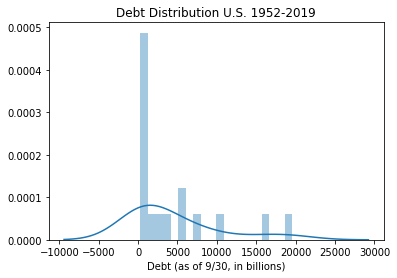

In [ ]:
sns.distplot(dfm['Debt (as of 9/30, in billions)'], bins=20);
plt.title('Debt Distribution U.S. 1952-2019');

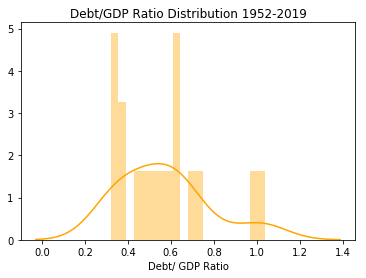

In [ ]:
sns.distplot(dfm['Debt/ GDP Ratio'], bins=20, color='orange');
plt.title('Debt/GDP Ratio Distribution 1952-2019');

In [ ]:
target = 'Incumbent Party Vote Share'
features = ['Debt (as of 9/30, in billions)',
           'Debt/ GDP Ratio']
X = dfm[features]
y = dfm[target]

In [ ]:
model.fit(X,y)
y_pred = model.predict(X)

In [ ]:
mean_absolute_error(y, y_pred)

4.381683075835241

In [ ]:
dfm['Linear Regression, Debt/DebtRatio'] = y_pred
dfm['Error2'] = y_pred - dfm[target]
dfm['Absolute Error2'] = dfm['Error2'].abs()
dfm.head()

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Mean Baseline,Error,Absolute Error,"Linear Regression, 1 feature","Linear Regression, 2 features","Debt (as of 9/30, in billions)",Debt/ GDP Ratio,Major Events by Presidential Term,"Linear Regression, Debt/DebtRatio",Error2,Absolute Error2
0,1952,Stevenson,Eisenhower,44.60,2.40,190,51.828235,0.247507,0.247507,53.637235,44.847507,259.0,0.72,NaN,51.253283,6.653283,6.653283
1,1956,Eisenhower,Stevenson,57.76,2.89,0,51.828235,-1.030524,1.030524,55.094582,56.729476,273.0,0.61,NaN,51.865680,-5.894320,5.894320
2,1960,Nixon,Kennedy,49.91,0.85,0,51.828235,-0.129201,0.129201,49.027260,49.780799,286.0,0.53,Recession.,52.310880,2.400880,2.400880
3,1964,Johnson,Goldwater,61.34,4.21,1,51.828235,-0.168074,0.168074,59.020495,61.171926,312.0,0.46,LBJ's budgets. War on poverty.,52.699494,-8.640506,8.640506
4,1968,Humphrey,Nixon,49.60,3.02,146,51.828235,-0.275542,0.275542,55.481225,49.324458,348.0,0.37,Moon landing.,53.198977,3.598977,3.598977


In [ ]:
#Test train split
trainm = dfm.query('Year < 2008')
testm  = dfm.query('Year >= 2008')
X_trainm = trainm[features] 
y_trainm = trainm[target]
X_testm  = testm[features]
y_testm  = testm[target]

X_trainm.shape, y_trainm.shape, X_testm.shape, y_testm.shape

((14, 2), (14,), (3, 2), (3,))

In [ ]:
model.fit(X_trainm, y_trainm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predm = model.predict(X_testm)
y_predm

array([50.02145038, 46.69697512, 45.8759202 ])

In [ ]:
ypredm2 = model.predict(X)

In [ ]:
y_testm

14    46.32
15    52.00
16    48.20
Name: Incumbent Party Vote Share, dtype: float64

In [ ]:
mean_absolute_error(y_testm, y_predm)

3.7761850194888638

In [ ]:
len(y_predm)

3

In [ ]:
dfm['Train Test Split Error, Linear Regression, Debt/DebtRatio'] = ypredm2
dfm['Error3'] = ypredm2 - dfm[target]
dfm['Absolute Error3'] = dfm['Error3'].abs()
dfm.head()

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Mean Baseline,Error,Absolute Error,"Linear Regression, 1 feature","Linear Regression, 2 features","Debt (as of 9/30, in billions)",Debt/ GDP Ratio,Major Events by Presidential Term,"Linear Regression, Debt/DebtRatio",Error2,Absolute Error2,"Train Test Split Error, Linear Regression, Debt/DebtRatio",Error3,Absolute Error3
0,1952,Stevenson,Eisenhower,44.60,2.40,190,51.828235,0.247507,0.247507,53.637235,44.847507,259.0,0.72,NaN,51.253283,6.653283,6.653283,50.778547,6.178547,6.178547
1,1956,Eisenhower,Stevenson,57.76,2.89,0,51.828235,-1.030524,1.030524,55.094582,56.729476,273.0,0.61,NaN,51.865680,-5.894320,5.894320,51.715535,-6.044465,6.044465
2,1960,Nixon,Kennedy,49.91,0.85,0,51.828235,-0.129201,0.129201,49.027260,49.780799,286.0,0.53,Recession.,52.310880,2.400880,2.400880,52.396663,2.486663,2.486663
3,1964,Johnson,Goldwater,61.34,4.21,1,51.828235,-0.168074,0.168074,59.020495,61.171926,312.0,0.46,LBJ's budgets. War on poverty.,52.699494,-8.640506,8.640506,52.991005,-8.348995,8.348995
4,1968,Humphrey,Nixon,49.60,3.02,146,51.828235,-0.275542,0.275542,55.481225,49.324458,348.0,0.37,Moon landing.,53.198977,3.598977,3.598977,53.754870,4.154870,4.154870


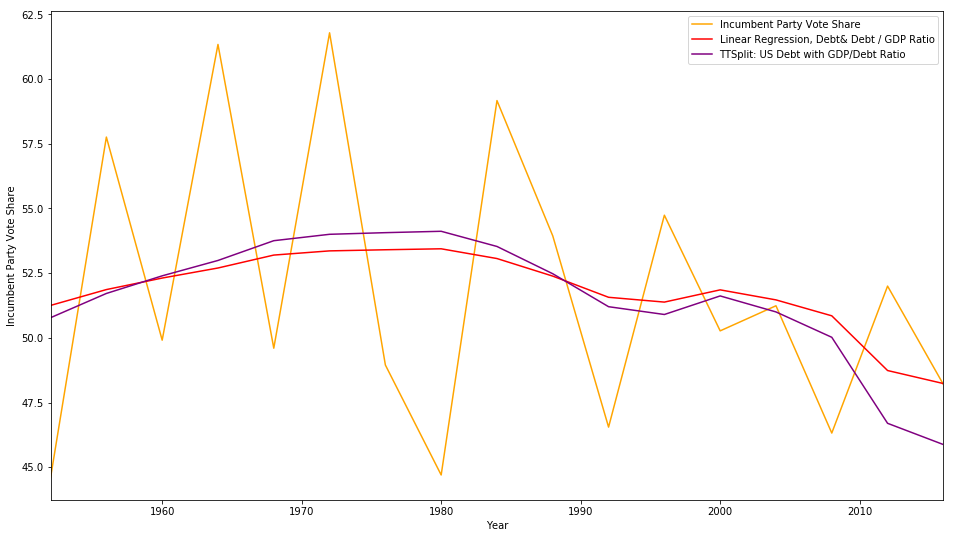

In [ ]:

ax = dfm.plot(x='Year', 
        y='Incumbent Party Vote Share',
        kind='line',
        label = 'Incumbent Party Vote Share',
        color='orange', figsize=(16,9));
dfm.plot(x='Year', 
        y='Linear Regression, Debt/DebtRatio',
        label = 'Linear Regression, Debt& Debt / GDP Ratio',
        kind='line', 
        color='red', 
        ax=ax)
dfm.plot(x='Year', 
        y='Train Test Split Error, Linear Regression, Debt/DebtRatio',
        label = 'TTSplit: US Debt with GDP/Debt Ratio',
        kind='line', 
        color='purple', 
        ax=ax);
plt.xlabel('Year')
plt.ylabel('Incumbent Party Vote Share');


In [ ]:
features = ['Average Recent Growth in Personal Incomes', 
            'US Military Fatalities per Million',
           'Debt (as of 9/30, in billions)',
            'Debt/ GDP Ratio']

target = 'Incumbent Party Vote Share'

X = dfm[features]
y = dfm[target]

In [ ]:
model.fit(X,y)
y_pred = model.predict(X)

In [ ]:
mean_absolute_error(y, y_pred)

1.215228215716582

In [ ]:
dfm['All Four Features'] = y_pred
dfm['Error4'] = y_pred - dfm[target]
dfm['Absolute Error4'] = dfm['Error4'].abs()
dfm.head()


,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Mean Baseline,Error,Absolute Error,"Linear Regression, 1 feature","Linear Regression, 2 features","Debt (as of 9/30, in billions)",Debt/ GDP Ratio,Major Events by Presidential Term,"Linear Regression, Debt/DebtRatio",Error2,Absolute Error2,"Train Test Split Error, Linear Regression, Debt/DebtRatio",Error3,Absolute Error3,All Four Features,Error4,Absolute Error4
0,1952,Stevenson,Eisenhower,44.60,2.40,190,51.828235,0.247507,0.247507,53.637235,44.847507,259.0,0.72,NaN,51.253283,6.653283,6.653283,50.778547,6.178547,6.178547,45.453591,0.853591,0.853591
1,1956,Eisenhower,Stevenson,57.76,2.89,0,51.828235,-1.030524,1.030524,55.094582,56.729476,273.0,0.61,NaN,51.865680,-5.894320,5.894320,51.715535,-6.044465,6.044465,57.472143,-0.287857,0.287857
2,1960,Nixon,Kennedy,49.91,0.85,0,51.828235,-0.129201,0.129201,49.027260,49.780799,286.0,0.53,Recession.,52.310880,2.400880,2.400880,52.396663,2.486663,2.486663,49.798836,-0.111164,0.111164
3,1964,Johnson,Goldwater,61.34,4.21,1,51.828235,-0.168074,0.168074,59.020495,61.171926,312.0,0.46,LBJ's budgets. War on poverty.,52.699494,-8.640506,8.640506,52.991005,-8.348995,8.348995,61.412230,0.072230,0.072230
4,1968,Humphrey,Nixon,49.60,3.02,146,51.828235,-0.275542,0.275542,55.481225,49.324458,348.0,0.37,Moon landing.,53.198977,3.598977,3.598977,53.754870,4.154870,4.154870,48.488948,-1.111052,1.111052


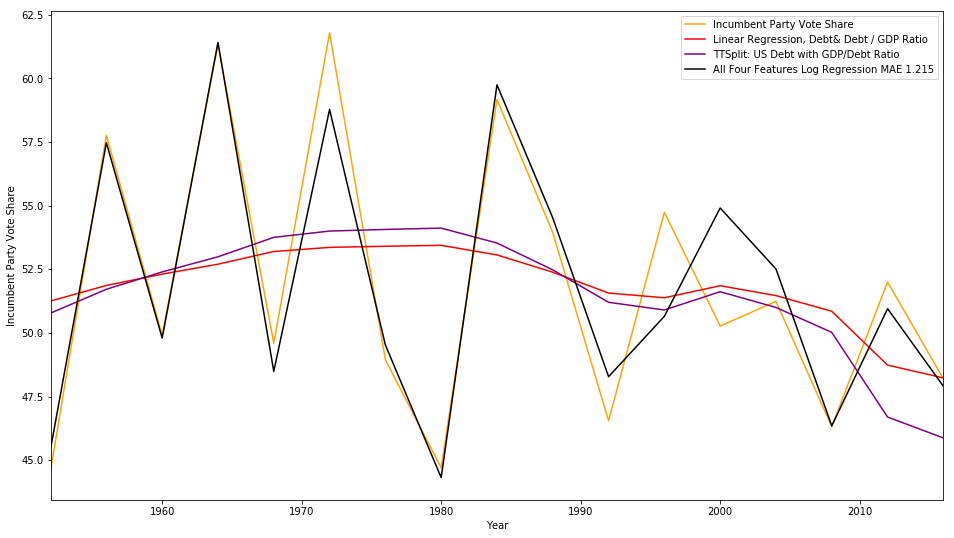

In [ ]:
ax = dfm.plot(x='Year', 
        y='Incumbent Party Vote Share',
        kind='line',
        label = 'Incumbent Party Vote Share',
        color='orange', figsize=(16,9));
dfm.plot(x='Year', 
        y='Linear Regression, Debt/DebtRatio',
        label = 'Linear Regression, Debt& Debt / GDP Ratio',
        kind='line', 
        color='red', 
        ax=ax)
dfm.plot(x='Year', 
        y='Train Test Split Error, Linear Regression, Debt/DebtRatio',
        label = 'TTSplit: US Debt with GDP/Debt Ratio',
        kind='line', 
        color='purple', 
        ax=ax);
dfm.plot(x='Year', 
        y='All Four Features',
        label = 'All Four Features Log Regression MAE 1.215',
        kind='line', 
        color='black', 
        ax=ax)
plt.xlabel('Year')
plt.ylabel('Incumbent Party Vote Share');

In [ ]:
#Leave one out cross validation

In [ ]:
# Choose a class of model by importing the appropriate estimator class
from sklearn.linear_model import LinearRegression

print('Leave-One-Out Cross-Validation:')

maes = []

for year in dfm['Year']:
    print(f'Fit Linear Regression on all years except {year}')
    
    # Choose model hyperparamaters by instantiating this class
    model = LinearRegression()
    
    # Arrange data into X features matrix and y target vector
    train = dfm[dfm['Year'] != year]
    test = dfm[dfm['Year'] == year]
    X_train = train[features]
    y_train = train[target]
    X_test = test[features]
    y_test = test[target]
    
    # Fit the model to your data by calling the fit() method of the estimator
    model.fit(X_train, y_train)
    
    # Apply the model to new data: predict labels for unknown data using predict() method
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    maes.append(mae)
    print(f'Absolute Error on prediction for {year} = {mae}')
    

Leave-One-Out Cross-Validation:
Fit Linear Regression on all years except 1952
Absolute Error on prediction for 1952 = 3.4577265548107974
Fit Linear Regression on all years except 1956
Absolute Error on prediction for 1956 = 0.45644415729313437
Fit Linear Regression on all years except 1960
Absolute Error on prediction for 1960 = 0.15251242009945543
Fit Linear Regression on all years except 1964
Absolute Error on prediction for 1964 = 0.10124598275618268
Fit Linear Regression on all years except 1968
Absolute Error on prediction for 1968 = 2.585177952960187
Fit Linear Regression on all years except 1972
Absolute Error on prediction for 1972 = 3.9079459760557143
Fit Linear Regression on all years except 1976
Absolute Error on prediction for 1976 = 0.7328452221426573
Fit Linear Regression on all years except 1980
Absolute Error on prediction for 1980 = 0.6958736647287438
Fit Linear Regression on all years except 1984
Absolute Error on prediction for 1984 = 0.7780136356078202
Fit Linear R